In [1]:
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import os

In [2]:
dataset_path = 'DATA/'
dataset_dir  = os.listdir(dataset_path)

In [3]:
training_data=[]
testing_data=[]
for i in range(1,41):
    j=1
    image=os.listdir('DATA/'+'s'+str(i)+'/')
    for k in image:
        if(j<=6):
            img=imread('DATA/'+'s'+str(i)+'/'+k)
            l=np.asarray(img)
            training_data.append(l.flatten())
            
        else:
            img=imread('DATA/'+'s'+str(i)+'/'+k)
            l=np.asarray(img)
            testing_data.append(l.flatten())
        j=j+1
print(len(training_data))
print(len(testing_data))

240
160


In [4]:
train_database=np.array(training_data).T
print(train_database.shape)

(10304, 240)


In [5]:
mn=10304
p=240
mean_face=np.zeros((mn,1))
for i in range(mn):
    for j in range(p):
        mean_face[i]=mean_face[i]+train_database[i][j]
    mean_face[i]=mean_face[i]/p
print(mean_face)

[[85.3375    ]
 [85.35416667]
 [85.7375    ]
 ...
 [73.32916667]
 [73.73333333]
 [73.20416667]]


In [6]:
do_mean_zero=np.zeros((mn,p))
for i in range(mn):
    for j in range(p):
        do_mean_zero[i][j]=train_database[i][j]-mean_face[i]
print(do_mean_zero.shape)
print(do_mean_zero)

(10304, 240)
[[-37.3375     -51.3375     -25.3375     ...  45.6625      44.6625
   42.6625    ]
 [-36.35416667 -51.35416667 -25.35416667 ...  39.64583333  37.64583333
   39.64583333]
 [-40.7375     -52.7375     -23.7375     ...  40.2625      41.2625
   39.2625    ]
 ...
 [-26.32916667 -36.32916667 -41.32916667 ...  15.67083333 -40.32916667
   11.67083333]
 [-27.73333333 -33.73333333 -39.73333333 ...  19.26666667 -36.73333333
   16.26666667]
 [-27.20416667 -40.20416667 -39.20416667 ...  17.79583333 -33.20416667
   10.79583333]]


In [7]:
def surogate_cov(col):
    mn,p=10304,240
    delta_matrix=np.zeros((p,p))
    for i in range(p):
        for j in range(p):
            delta_matrix[i][j]=(1/mn)*np.dot(do_mean_zero[:,j].T,do_mean_zero[:,i])
    return delta_matrix

In [8]:
cov_mat=surogate_cov(do_mean_zero)
print(cov_mat.shape)

(240, 240)


In [9]:
eigvals, eigvecs = np.linalg.eig(cov_mat)
idx = eigvals.argsort()[::-1]
eigenValues = eigvals[idx]
eigenVectors = eigvecs[:,idx]
eigenValues=np.diag(eigenValues)
print(eigenValues)
print(eigenVectors)

[[ 6.85942729e+04  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  4.88744315e+04  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  2.65915033e+04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  5.53806490e+01
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   5.38433125e+01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00 -2.19594464e-11]]
[[-0.05540024 -0.05489584  0.10650774 ...  0.01199206 -0.00667667
  -0.06454972]
 [-0.09900508 -0.05193554  0.07060146 ... -0.01917485  0.02239874
  -0.06454972]
 [-0.11002278 -0.03457763 -0.02762099 ...  0.03396312 -0.02163922
  -0.06454972]
 ...
 [-0.03310308 -0.08856274 -0.04906635 ... -0.00763014  0.01217754
  -0.06454972]
 [-0.01812843 -0.00060335 -0.144017

In [10]:
k = 100
reduced_data = eigenVectors[:,0:k]
print(reduced_data)

[[-0.05540024 -0.05489584  0.10650774 ... -0.00593167  0.0049732
  -0.00210987]
 [-0.09900508 -0.05193554  0.07060146 ... -0.11538377  0.06211285
   0.04315115]
 [-0.11002278 -0.03457763 -0.02762099 ... -0.07958945 -0.03558086
  -0.03669805]
 ...
 [-0.03310308 -0.08856274 -0.04906635 ... -0.02151901 -0.0584692
  -0.0119263 ]
 [-0.01812843 -0.00060335 -0.14401766 ...  0.07223193  0.10111922
  -0.04094951]
 [-0.04065823 -0.07504021 -0.05982711 ... -0.01661378  0.0088549
  -0.05578082]]


In [11]:
eigen_faces = np.dot(reduced_data.T,do_mean_zero.T)
print(eigen_faces.shape)
print(eigen_faces)

(100, 10304)
[[  93.03543097   91.61639707   93.09379009 ...  153.13488452
   159.73673833  178.13087815]
 [-318.82262951 -319.86134525 -317.90019676 ...  246.86239146
   233.71772713  216.90719978]
 [-342.47305109 -343.53826075 -339.6572801  ... -171.22124843
  -160.03121595 -168.8683265 ]
 ...
 [   3.77905985    4.31392705   -1.98375898 ...    7.53245526
   -16.06770241  -48.23093631]
 [   5.59428081    1.59409675   -2.64100055 ...   15.00352717
   -16.16296842  -26.54297242]
 [  -7.39135327   -5.22774467   -4.34573813 ...  -28.54642429
    10.954182     -8.54116725]]


In [12]:
sign=np.dot(eigen_faces,do_mean_zero)
print(sign.shape)

(100, 240)


In [13]:
test_face=np.array(testing_data)
test_face=test_face.transpose()
print(test_face.shape)
print(mean_face.shape)

(10304, 160)
(10304, 1)


In [14]:
do_mean_zero1=np.zeros((test_face.shape))
for i in range(10304):
    for j in range(160):
        do_mean_zero1[i][j]=test_face[i][j]-mean_face[i]
print(do_mean_zero1)

[[-42.3375     -44.3375     -41.3375     ...  43.6625      39.6625
   33.6625    ]
 [-35.35416667 -38.35416667 -42.35416667 ...  41.64583333  33.64583333
   34.64583333]
 [-44.7375     -38.7375     -53.7375     ...  47.2625      38.2625
   34.2625    ]
 ...
 [ 84.67083333 -38.32916667 -30.32916667 ...  19.67083333 -37.32916667
   15.67083333]
 [ 79.26666667 -36.73333333 -30.73333333 ...  19.26666667 -34.73333333
   20.26666667]
 [ 95.79583333 -35.20416667 -36.20416667 ...  19.79583333 -33.20416667
   11.79583333]]


In [15]:
project_face=np.dot(eigen_faces,do_mean_zero1)
print(project_face.shape)
print(project_face)

(100, 160)
[[-6.57937249e+07 -6.07882792e+07 -7.25843403e+07 ... -2.70514952e+07
  -1.82284117e+07 -3.50326625e+07]
 [-2.37026931e+07 -1.74753069e+07 -1.37052034e+07 ... -2.96563374e+07
  -2.48558866e+07 -2.94795359e+07]
 [ 2.94450048e+06  1.84032102e+07  2.17450598e+07 ... -1.87691047e+07
  -2.57925753e+07 -1.24021607e+07]
 ...
 [-1.94393806e+04 -1.18430712e+04  2.89339866e+05 ... -1.93097840e+05
  -1.19313923e+05 -4.45173326e+04]
 [ 3.67652781e+05 -2.36427614e+04 -9.97059717e+04 ... -6.86361882e+04
   2.60839233e+05  6.10104305e+03]
 [-5.38663225e+05 -3.23024520e+04  4.94002660e+04 ... -3.84551951e+05
   5.01322117e+05 -1.18494817e+05]]


In [16]:
true_Labels = np.arange(0,160)
true_Labels = (true_Labels//4)

In [17]:
from math import * #FUNCTION FOR EUCLIDEAN-DISTANCE
def euclidean_distance(x,y):
    return sqrt(sum(pow(a-b,2) for a,b in zip(x,y)))

In [18]:
def accuracy_fun(true_cl,pred_cl):
    count = 0
    r=len(true_cl)
    for i in range(len(true_cl)):
        if(true_cl[i] == pred_cl[i]):
            count += 1
    accuracy_val = (count/len(true_cl))*100
    return accuracy_val

In [20]:
import sys
accuracy_curve = []
for k in range(0,31):

    min_dist = sys.maxsize
    distances = [0] * test_face.shape[1]
    classes = [0] * test_face.shape[1]

    for i in range (test_face.shape[1]):
        for j in range (train_database.shape[1]):
            dist = euclidean_distance(project_face[0:k,i],sign[0:k,j])
            if(dist < min_dist):
                min_dist = dist
                label = j

        distances[i] = min_dist
        classes[i] = label//6
        min_dist = sys.maxsize

    accuracy = accuracy_fun(true_Labels,classes)
    accuracy_curve.append(accuracy)
print(accuracy_curve)

[2.5, 7.5, 33.125, 61.875, 66.25, 70.625, 77.5, 80.0, 81.25, 81.25, 82.5, 83.125, 83.75, 83.75, 83.75, 84.375, 84.375, 84.375, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.625, 85.625]


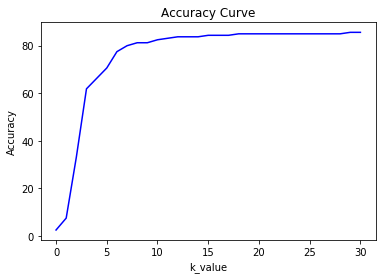

In [21]:
plt.plot(np.arange(0,31), accuracy_curve, color ="blue")  
plt.title("Accuracy Curve")  
plt.xlabel("k_value")  
plt.ylabel("Accuracy") 
plt.show()